In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from google.colab import drive


plt.rcParams["savefig.bbox"] = 'tight'

In [57]:
from torchvision.transforms.transforms import InterpolationMode


In [12]:
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
#For visualization
def visualize(imgs, **imshow_kwargs):
    fig, axs = plt.subplots(1, len(imgs), figsize=(15, 15))
    for row_idx, row in enumerate([imgs]):
        for col_idx, img in enumerate(row):
            ax = axs[col_idx]
            ax.imshow(np.asarray(img))
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.tight_layout()

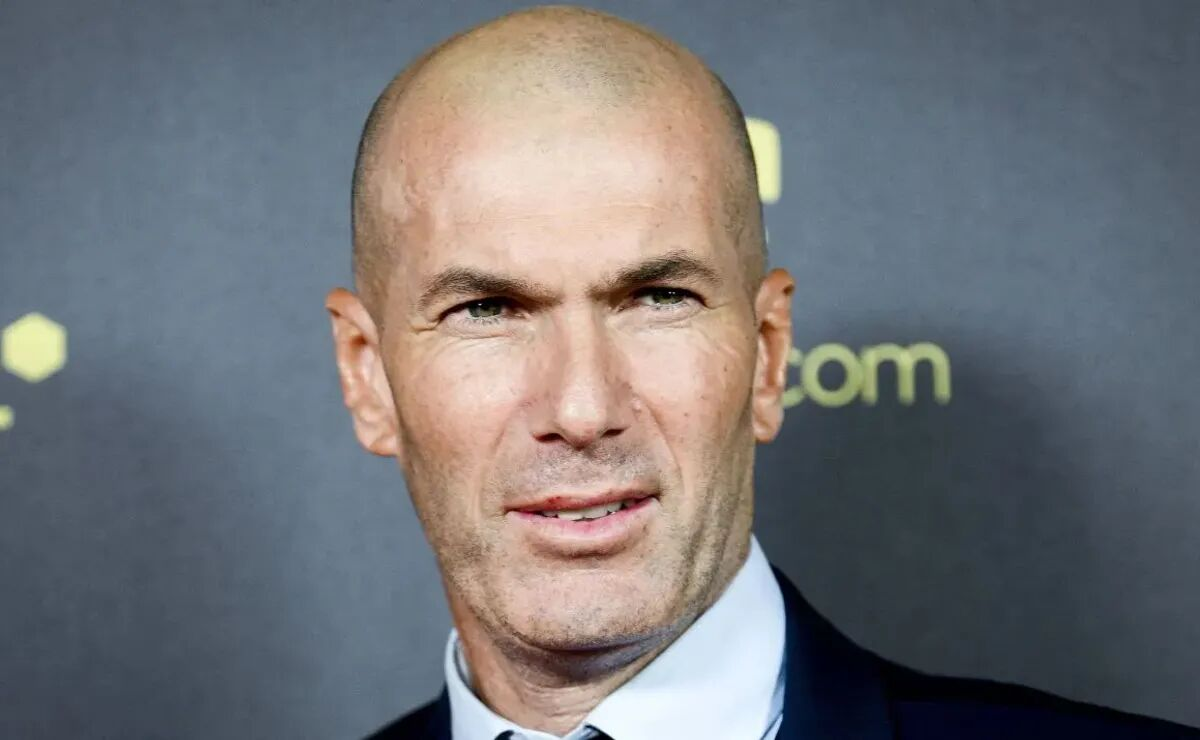

In [39]:
#main path and simpel run
img_path = "/content/drive/MyDrive/data/a.jpg"
original_img = Image.open(img_path)
original_img

##Pdding

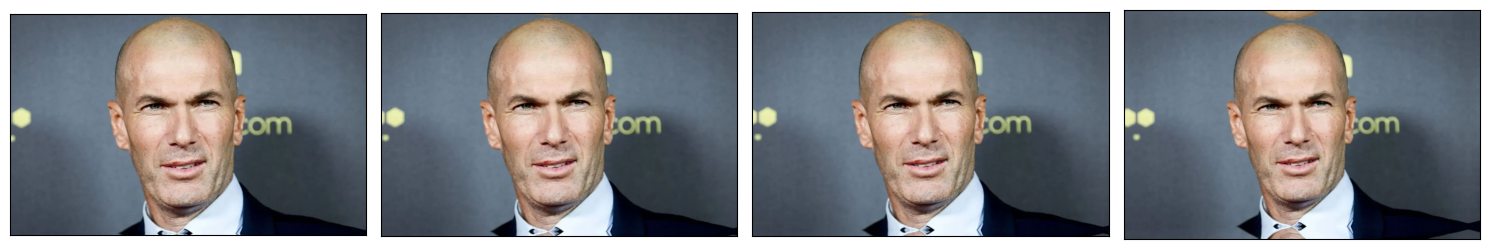

In [35]:

padded_imgs = [transforms.Pad(padding=padding, padding_mode='reflect')(original_img) for padding in (5, 15, 20, 45)]
visualize(padded_imgs)

##Resize (good choice for changing resolution)
###main parameters:
* `size`


original_img.size: (1200, 740)


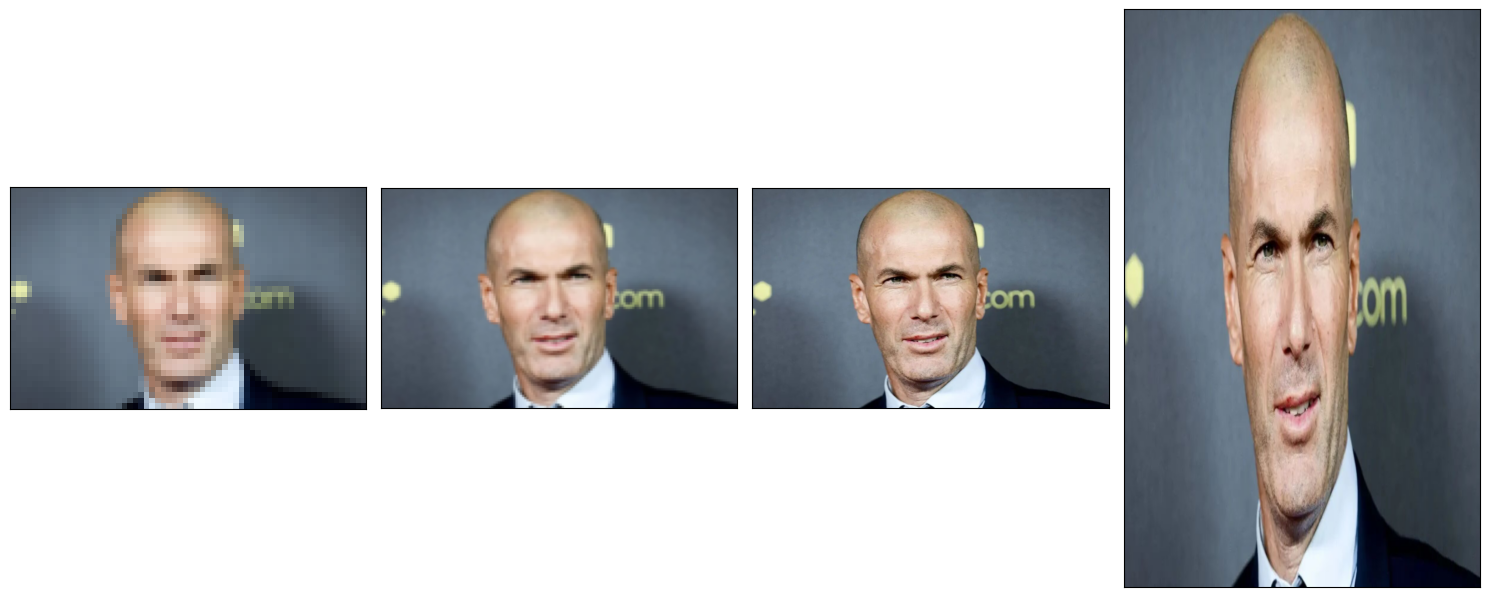

In [41]:
resized_imgs = [transforms.Resize(size=size)(original_img) for size in ( 40, 100,500, original_img.size)]
visualize(resized_imgs)
print("original_img.size:", original_img.size)

##Color Jitter
###main parameters:
* `brightness`
* `contrast`
* `saturation`


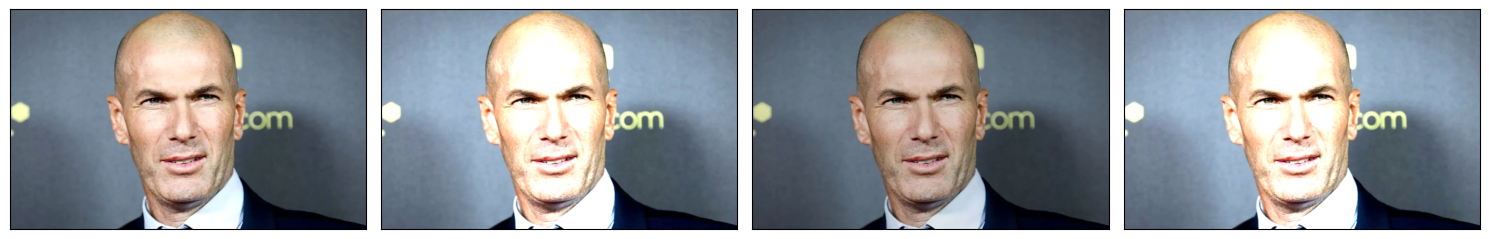

In [53]:
jitter_transform = transforms.ColorJitter(brightness=0.6)
jitted_imgs = [jitter_transform(original_img) for _ in range(4)]
visualize(jitted_imgs)

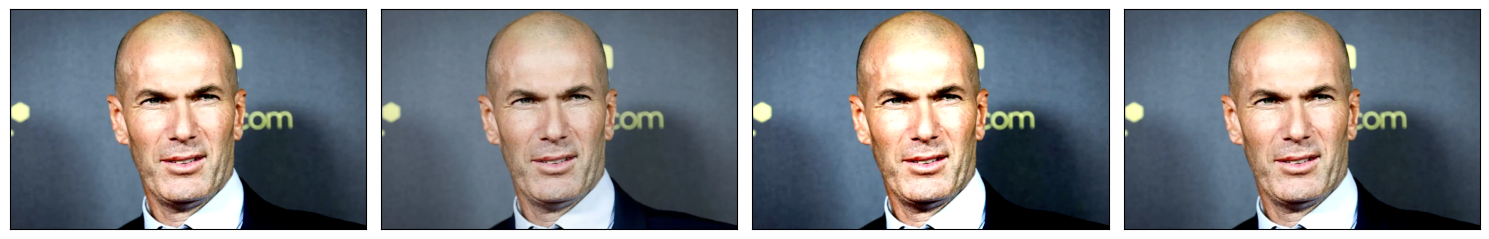

In [54]:
jitter_transform = transforms.ColorJitter(contrast=0.6)
jitted_imgs = [jitter_transform(original_img) for _ in range(4)]
visualize(jitted_imgs)

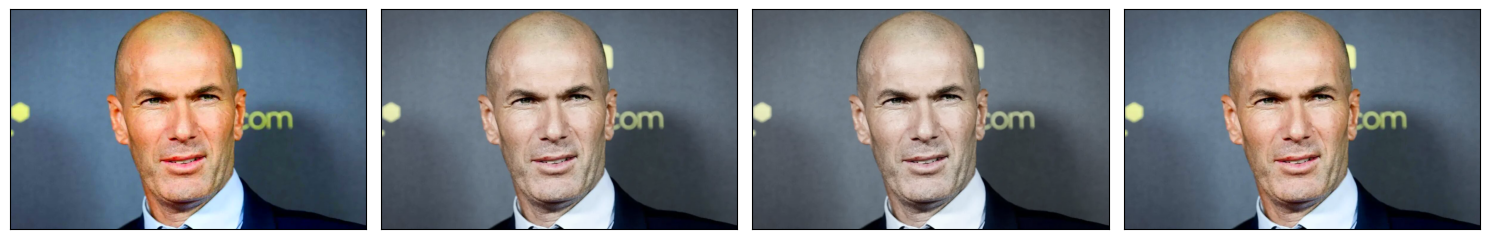

In [56]:
jitter_transform = transforms.ColorJitter(saturation=0.8)
jitted_imgs = [jitter_transform(original_img) for _ in range(4)]
visualize(jitted_imgs)

##RandomPerspective
###main parameters:
* `distortion_scale`
* `p`
* `interpolation`
* `fill`


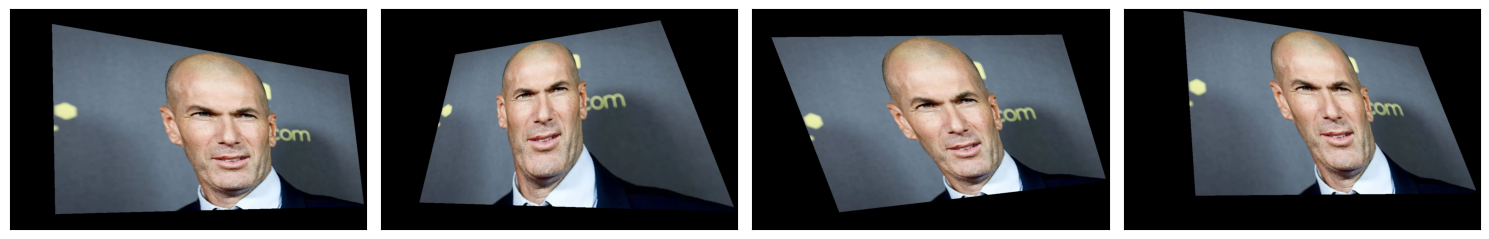

In [60]:
rand_persp = transforms.RandomPerspective(distortion_scale=0.6,
                                          p=1.1,
                                          interpolation=InterpolationMode.NEAREST)
perspective_imgs = [rand_persp(original_img) for _ in range(4)]
visualize(perspective_imgs)

##RandomRotation
###main parameters:
* `degrees`
* `interpolation`
* `expand`
* `center`
* `fill`


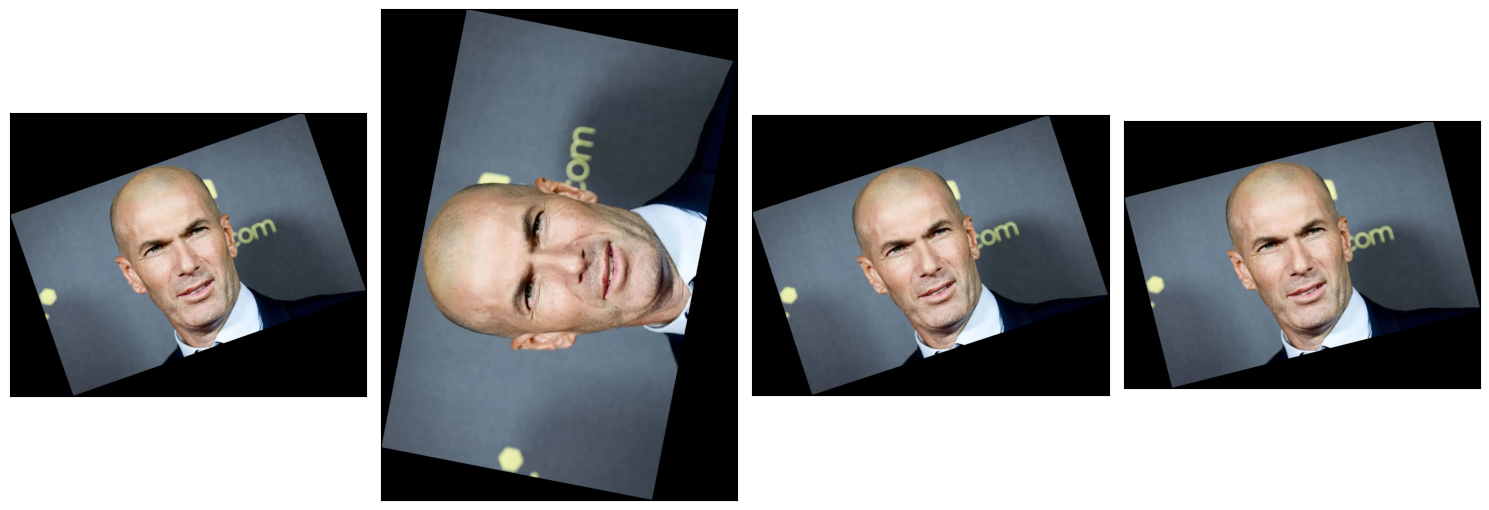

In [72]:
rotated_imgs = [transforms.RandomRotation(degrees=(0, 90), expand=True)(original_img) for _ in range(4)]
visualize(rotated_imgs)